<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/Zero_Shot_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INF6804 Vision par ordinateur

**Polytechnique Montréal**  
**Auteur :** Khalil Sabri  

**Description :** Ce notebook présente un exemple d'utilisation du modèle CLIPSeg pour réaliser de la segmentation d'images en mode zero-shot. Pour chaque exemple, une image (extrait du dataset COCO val2017) et une requête textuelle sont fournis, puis le masque de segmentation est affiché.


#### 1. Imports

In [ ]:
import torch
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
from io import BytesIO

#### 2. Charger le modèle CLIPSeg et le processor


In [ ]:
model_name = "CIDAS/clipseg-rd64-refined"
processor = CLIPSegProcessor.from_pretrained(model_name)
model = CLIPSegForImageSegmentation.from_pretrained(model_name)

#### 3. Définir les exemples

In [ ]:
# Chaque exemple est défini par une URL d'image et une requête textuelle associée.
examples = [
    {"url": "http://images.cocodataset.org/val2017/000000397133.jpg", "prompt": "a person"},
    {"url": "http://images.cocodataset.org/train2017/000000000009.jpg", "prompt": "broccoli"},
    {"url": "http://images.cocodataset.org/val2017/000000039769.jpg", "prompt": "a cat"},
    {"url": "http://images.cocodataset.org/val2017/000000000632.jpg", "prompt": "bed"},
    {"url": "http://images.cocodataset.org/val2017/000000000632.jpg", "prompt": "window"}, ## same image, different object
]

#### 4. Inférence et visualisation

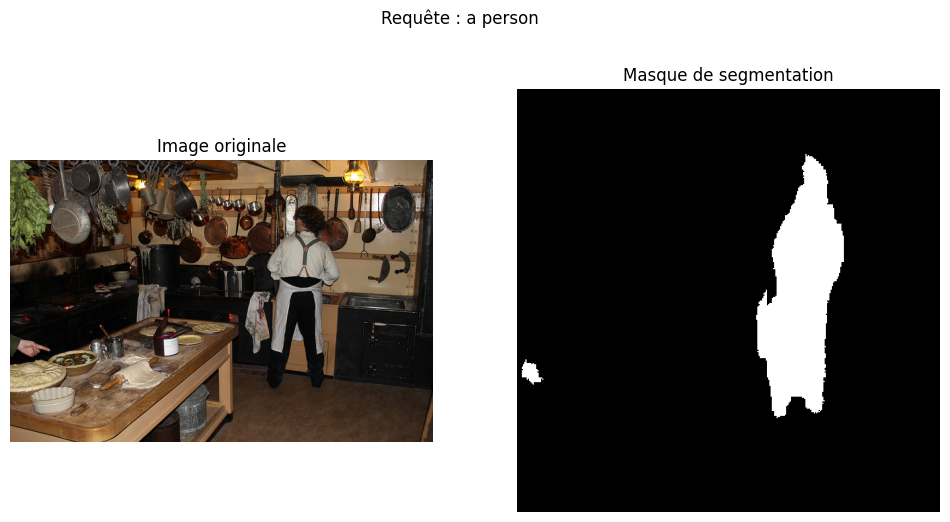

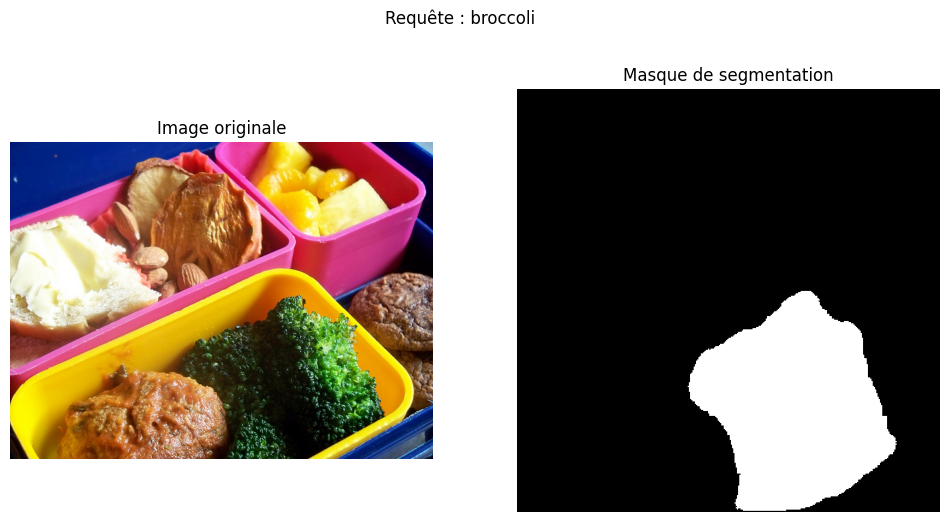

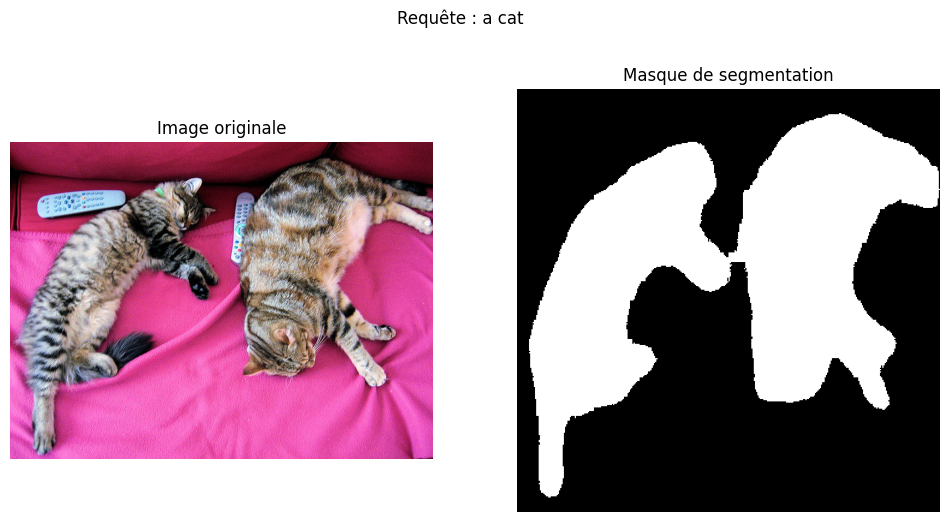

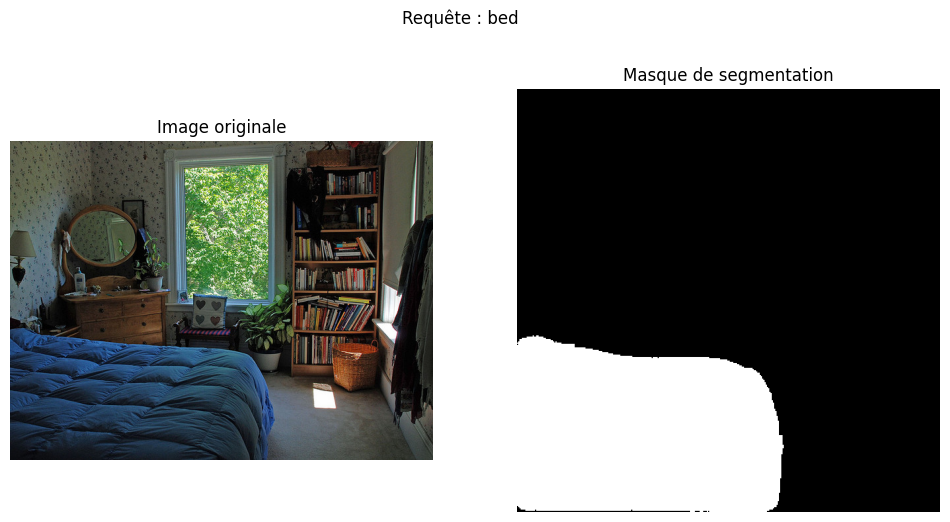

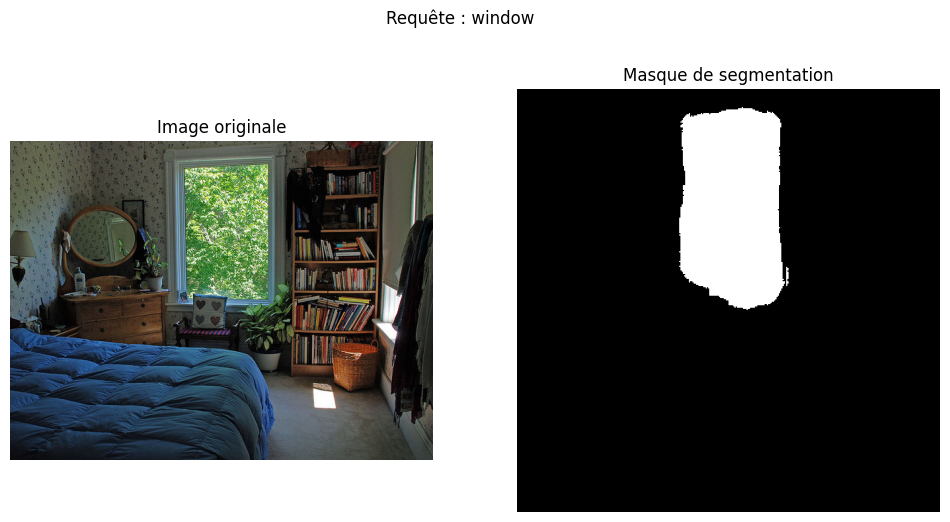

In [ ]:
for example in examples:
    # Charger l'image depuis l'URL et la convertir en RGB
    response = requests.get(example["url"])
    image = Image.open(BytesIO(response.content)).convert("RGB")


    # Prétraitement de l'image et de la requête textuelle
    inputs = processor(text=example["prompt"], images=image, return_tensors="pt")

    # Inférence (mode évaluation)
    with torch.no_grad():
        outputs = model(**inputs)

    # Appliquer la sigmoïde aux logits pour obtenir des probabilités et extraire le masque 2D
    # Ici, outputs.logits a la forme (1, H, W), donc on indexe simplement [0]
    pred_mask = outputs.logits.sigmoid().detach().cpu().numpy()[0]
    mask_binary = pred_mask > 0.5  # Seuillage pour obtenir un masque binaire

    # Visualiser l'image originale et le masque de segmentation
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Requête : {example['prompt']}")

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_binary, cmap="gray")
    plt.title("Masque de segmentation")
    plt.axis("off")

    plt.show()